# <font color='blue'>***Machine Leaning Project - Gender Classification*** 



---



---




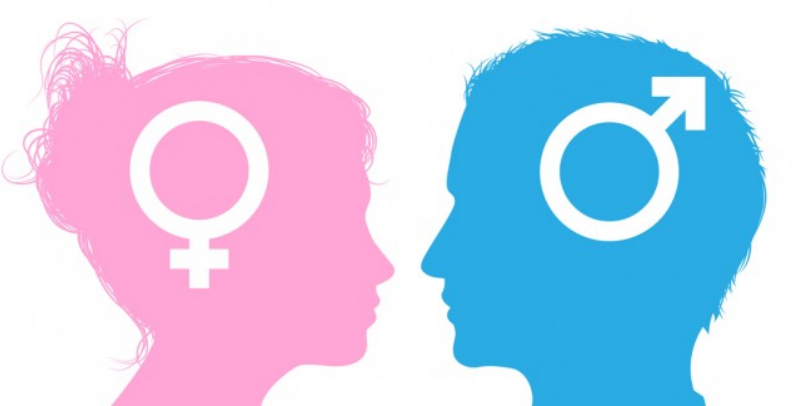


## <font color = 'red'>**1. Group Members: Name and roll numbers** </font>


---



### Ishika Chaudhary (20/49039)




## <font color = 'red'>**2.Dataset description and target attribute** </font>


---

### The dataset contains information about individuals with a focus on their demographic and socio-economic characteristics. The dataset has 9 columns, with each row representing a unique individual.<br>
**Gender:** The gender of the individual (either male or female)<br>
**Age:** The age of the individual in years<br>
**Height (cm):** The height of the individual in centimeters<br>
**Weight (kg):** The weight of the individual in kilograms<br>
**Occupation:** The occupation of the individual<br>
**Education Level:** The education level of the individual (ranging from high school diploma to doctoral degree)<br>
**Marital Status:** The marital status of the individual (either married or single)<br>
**Income (USD):** The income of the individual in US dollars<br>
**Favorite Color:** The favorite color of the individual<br>

###<font color='blue'>**Target Attribute - Gender**</font>
**Gender** is a binary class attribute having classes - 'male' and 'female'



## <font color = 'red'>**3. Exploratory Data Analysis** </font>
---

## Imports
---

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

## Data Loading
---

In [187]:
df = pd.read_csv('gender.csv')

In [193]:
df.head()

,Gender,Age,Height(cm),Weight(kg),Occupation,EducationLevel,MaritalStatus,Income(USD),FavoriteColor
0,male,32,175,70,SoftwareEngineer,Master'sDegree,Married,75000,Blue
1,male,25,182,85,SalesRepresentative,Bachelor'sDegree,Single,45000,Green
2,female,41,160,62,Doctor,DoctorateDegree,Married,120000,Purple
3,male,38,178,79,Lawyer,Bachelor'sDegree,Single,90000,Red
4,female,29,165,58,GraphicDesigner,Associate'sDegree,Single,35000,Yellow


In [189]:
df.tail()

,Gender,Age,Height(cm),Weight(kg),Occupation,EducationLevel,MaritalStatus,Income(USD),FavoriteColor
126,female,32,170,64,Nurse,Associate'sDegree,Single,60000,Orange
127,male,38,176,79,ProjectManager,Bachelor'sDegree,Married,90000,Black
128,female,27,162,55,GraphicDesigner,Associate'sDegree,Single,55000,Green
129,male,33,175,77,SalesRepresentative,Bachelor'sDegree,Married,80000,Yellow
130,female,29,164,57,SoftwareDeveloper,Bachelor'sDegree,Single,65000,Blue


In [192]:
class_=df['Gender'].unique()
class_

array(['male', 'female'], dtype=object)

In [194]:
df.shape

(131, 9)

In [195]:
df.columns

Index(['Gender', 'Age', 'Height(cm)', 'Weight(kg)', 'Occupation',
       'EducationLevel', 'MaritalStatus', 'Income(USD)', 'FavoriteColor'],
      dtype='object')

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          131 non-null    object
 1   Age             131 non-null    int64 
 2   Height(cm)      131 non-null    int64 
 3   Weight(kg)      131 non-null    int64 
 4   Occupation      131 non-null    object
 5   EducationLevel  131 non-null    object
 6   MaritalStatus   131 non-null    object
 7   Income(USD)     131 non-null    int64 
 8   FavoriteColor   131 non-null    object
dtypes: int64(4), object(5)
memory usage: 9.3+ KB


In [197]:
df.dtypes

Gender            object
Age                int64
Height(cm)         int64
Weight(kg)         int64
Occupation        object
EducationLevel    object
MaritalStatus     object
Income(USD)        int64
FavoriteColor     object
dtype: object

In [198]:
df.describe()

,Age,Height(cm),Weight(kg),Income(USD)
count,131.000000,131.000000,131.000000,131.000000
mean,34.564885,173.198473,71.458015,93206.106870
std,5.984723,8.045467,12.648052,74045.382919
min,24.000000,160.000000,50.000000,30000.000000
25%,29.000000,166.000000,60.000000,55000.000000
50%,34.000000,175.000000,75.000000,75000.000000
75%,39.000000,180.500000,83.000000,100000.000000
max,52.000000,190.000000,94.000000,500000.000000


In [150]:
df.isnull().any()

Gender            False
Age               False
Height(cm)        False
Weight(kg)        False
Occupation        False
EducationLevel    False
MaritalStatus     False
Income(USD)       False
FavoriteColor     False
dtype: bool

In [151]:
df.nunique()

Gender             2
Age               25
Height(cm)        27
Weight(kg)        34
Occupation        19
EducationLevel     4
MaritalStatus      4
Income(USD)       22
FavoriteColor      9
dtype: int64

## ***`Categorical attributes analysis`***

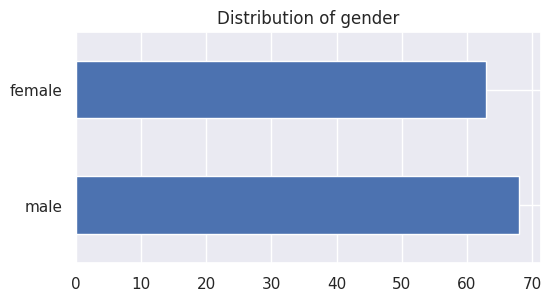

In [237]:
plt.figure(figsize=(6,3))
df["Gender"].value_counts().plot(kind = "barh")
plt.title("Distribution of gender")
plt.show()

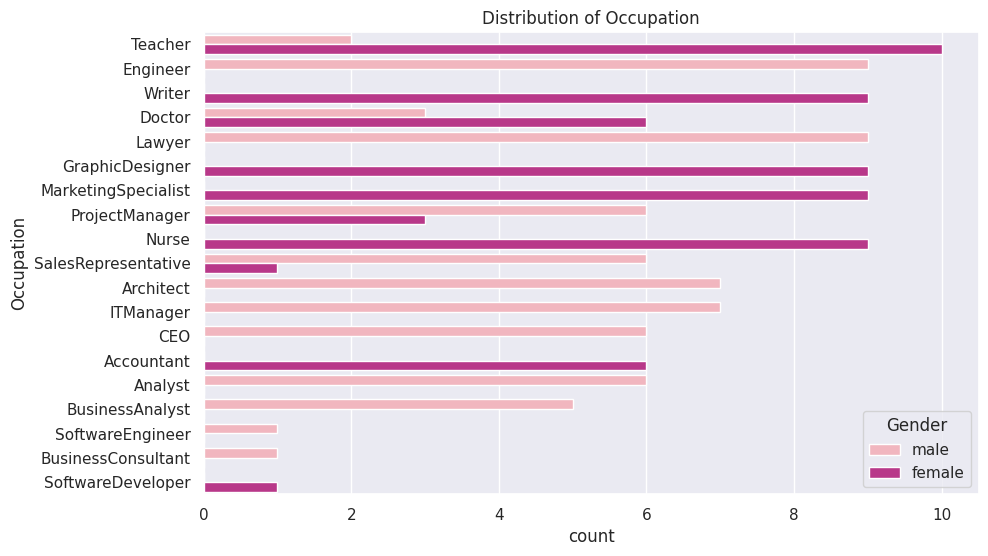

In [236]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, y = "Occupation", hue = "Gender", order = df['Occupation'].value_counts().index, palette="RdPu")
plt.title("Distribution of Occupation")
plt.show()

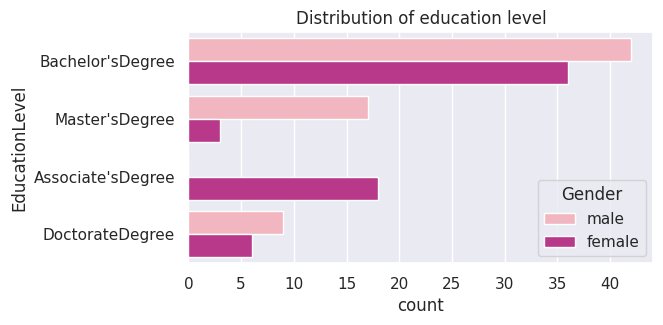

In [235]:
plt.figure(figsize=(6,3))
sns.countplot(data = df, y = "EducationLevel", hue = "Gender",order = df['EducationLevel'].value_counts().index,  palette="RdPu")
plt.title("Distribution of education level")
plt.show()

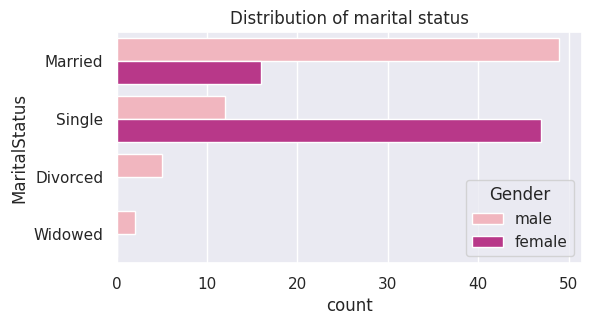

In [234]:
plt.figure(figsize=(6,3))
sns.countplot(data = df, y = "MaritalStatus", hue = "Gender", order = df['MaritalStatus'].value_counts().index,  palette="RdPu")
plt.title("Distribution of marital status")
plt.show()

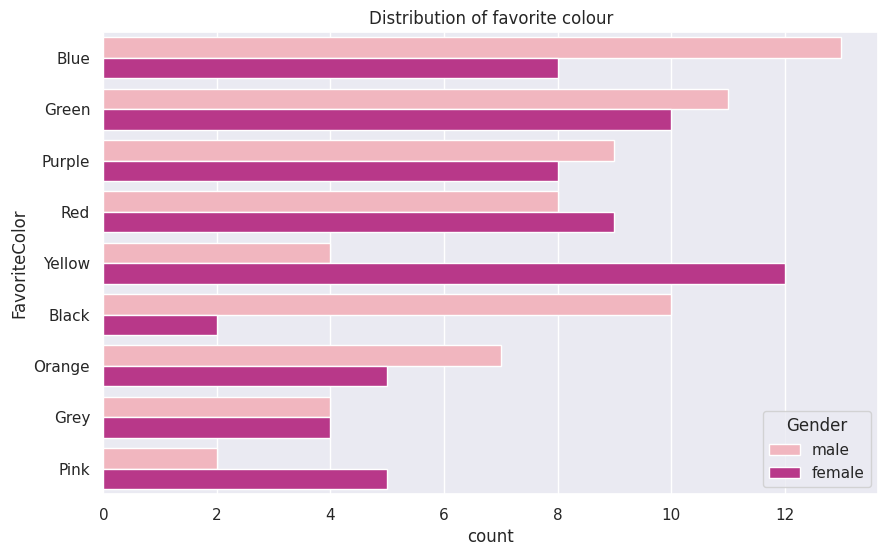

In [233]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, y = "FavoriteColor", hue = "Gender", order = df['FavoriteColor'].value_counts().index,  palette="RdPu")
plt.title("Distribution of favorite colour")
plt.show()

# ***`Relationship of discrete attributes with each other`***

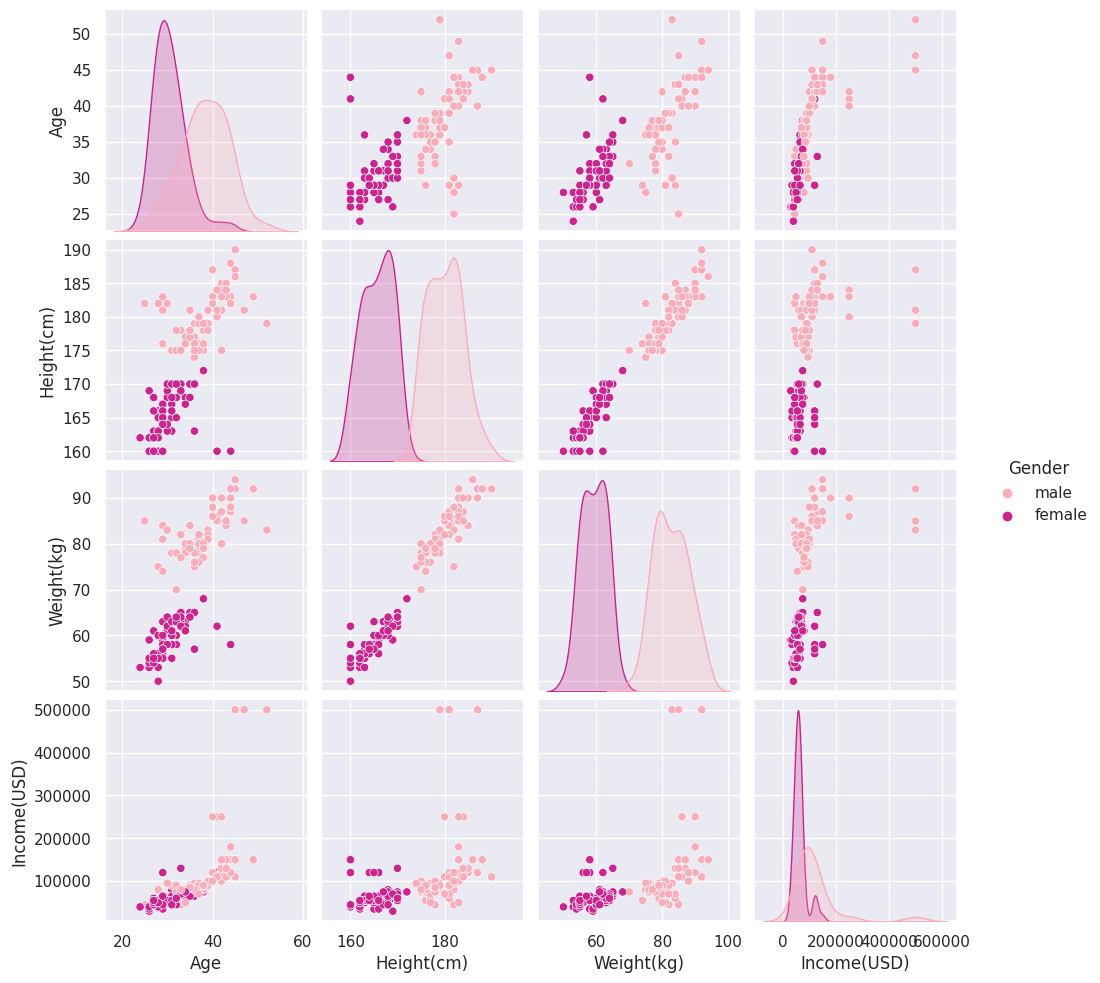

In [226]:
sns.pairplot(df, hue = "Gender",  palette="RdPu")
plt.show()

In [158]:
df.corr()

,Age,Height(cm),Weight(kg),Income(USD)
Age,1.000000,0.726308,0.784738,0.662278
Height(cm),0.726308,1.000000,0.975157,0.456217
Weight(kg),0.784738,0.975157,1.000000,0.486022
Income(USD),0.662278,0.456217,0.486022,1.000000


<Axes: >

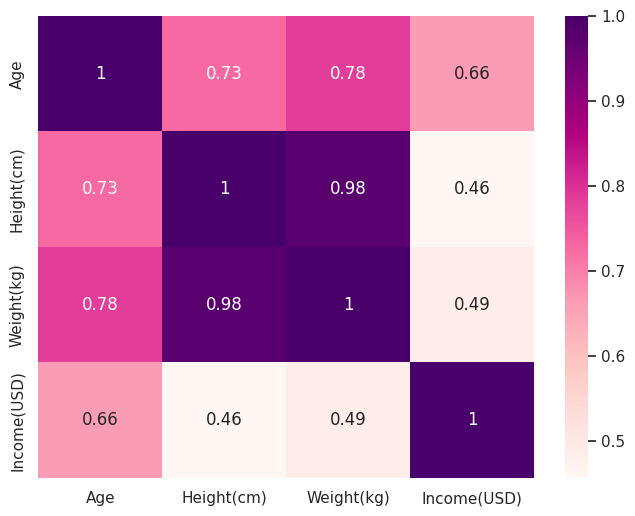

In [232]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot = True,  cmap="RdPu")

## <font color = 'red'>**4. Pre-Processing** </font>
---
REMOVING NULL-VALUES AND OUTLIERS

In [160]:
df.isnull().sum()

Gender            0
Age               0
Height(cm)        0
Weight(kg)        0
Occupation        0
EducationLevel    0
MaritalStatus     0
Income(USD)       0
FavoriteColor     0
dtype: int64

<Axes: >

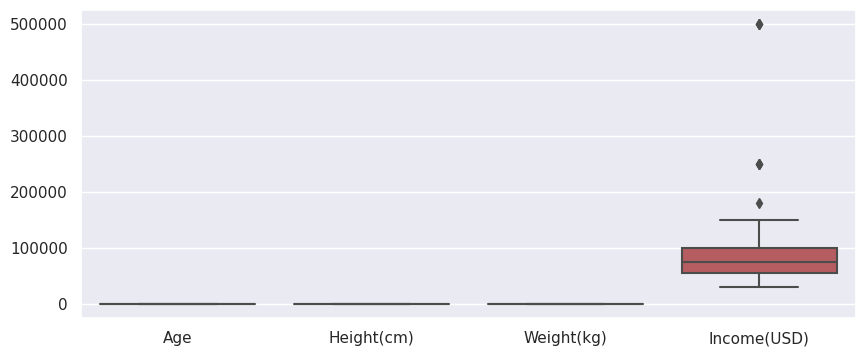

In [240]:
sns.set(rc={'figure.figsize':(10,4)})
sns.boxplot(data=df.iloc[:,1:])

In [162]:
print(np.where(df['Income(USD)']>150000))

(array([  7,  24,  40,  44,  65,  94, 119]),)


### **Label-Encoding**

In [163]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols
le = LabelEncoder()

for col in cat_cols: 
    le.fit(df[col])
    df[col] = le.transform(df[col])

In [164]:
class_counts = df['Gender'].value_counts()
class_counts
c=len(class_counts)

In [165]:
features =  (['Age', 'Height(cm)', 'Weight(kg)', 'Occupation', 'EducationLevel', 'MaritalStatus', 'Income(USD)', 'FavoriteColor'])
X = df[features].values
y = df['Gender'].values


###Scaling

In [166]:
from sklearn.preprocessing import StandardScaler

print("Mean and Standard Deviation Before")
print(X.mean(axis=0), X.std(axis=0))


sc=StandardScaler()
XScaled = sc.fit_transform(X)


print("Mean and Standard Deviation After")
print(XScaled.mean(axis=0).round(4), XScaled.std(axis=0))


Mean and Standard Deviation Before
[3.45648855e+01 1.73198473e+02 7.14580153e+01 9.38931298e+00
 1.28244275e+00 1.44274809e+00 9.32061069e+04 3.96183206e+00] [5.96183695e+00 8.01470009e+00 1.25996847e+01 5.27643836e+00
 8.84772012e-01 5.94636400e-01 7.37622255e+04 2.70257039e+00]
Mean and Standard Deviation After
[-0.  0.  0. -0.  0. -0.  0.  0.] [1. 1. 1. 1. 1. 1. 1. 1.]


## <font color = 'red'>**5. Classification using k-fold cross-validation** </font>
---

## Classifiers 
---


1. Logistic Regression
2. Decision Tree Classifier
3. Gaussian Naive Bayes Classifier
4. K- Nearest  Neighbour classifier






In [167]:
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

# 1. Logistic Regression Classification Model

---



In [168]:
from sklearn.linear_model import LogisticRegression

In [169]:
def LRclassifier(k):
  skf=StratifiedKFold(n_splits=k,shuffle=True,random_state=2)
  acc=[]
  net_mat=np.zeros((c,c))
  for train_index,test_index in skf.split(XScaled,y):
      X_train=X[train_index]
      X_test=X[test_index]
      Y_train=y[train_index]
      Y_test=y[test_index]
      LRModel = LogisticRegression(max_iter=1000)
      LRModel.fit(X_train, Y_train)
      Y_testPred = LRModel.predict(X_test)
      testAccuracy = metrics.accuracy_score(Y_test, Y_testPred)
      #print("Test Accuracy", testAccuracy*100)
      acc.append(testAccuracy)
      matrix1=confusion_matrix(Y_test,Y_testPred)
      net_mat=net_mat+matrix1
     # plot_confusion_matrix(matrix1,show_normed=True,colorbar=True,show_absolute=True)
     # plt.show()
  return acc,net_mat

# 2. Decision Tree Classification Model

---



In [170]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [247]:
def DTclassifier(k): 
  skf=StratifiedKFold(n_splits=k,shuffle=True,random_state=2)
  acc=[]
  net_mat=np.zeros((c,c))
  for train_index,test_index in skf.split(XScaled,y):
      X_train=X[train_index]
      X_test=X[test_index]
      Y_train=y[train_index]
      Y_test=y[test_index]
      DTModel = DecisionTreeClassifier(max_depth=3, random_state=360)
      DTModel.fit(X_train, Y_train)
      plt.subplots(figsize=(5,3))
      tree.plot_tree(DTModel,feature_names=features, filled=True, rounded=True, class_names=class_);
      Y_testPred = DTModel.predict(X_test)
      testAccuracy = metrics.accuracy_score(Y_test, Y_testPred)
      #print("Test Accuracy", testAccuracy*100)
      acc.append(testAccuracy)
      matrix1=confusion_matrix(Y_test,Y_testPred)
      net_mat=net_mat+matrix1
      #plot_confusion_matrix(matrix1,show_normed=True,colorbar=True,show_absolute=True)
      #plt.show()
  return acc,net_mat

# 3. Gaussian Naive Bayes Classification Model


---



In [172]:
from sklearn.naive_bayes import GaussianNB

In [173]:
def NBclassifier(k):
  skf=StratifiedKFold(n_splits=k,shuffle=True,random_state=2)
  acc=[]
  net_mat=np.zeros((c,c))
  for train_index,test_index in skf.split(XScaled,y):
      X_train=X[train_index]
      X_test=X[test_index]
      Y_train=y[train_index]
      Y_test=y[test_index]
      NB = GaussianNB()
      NB.fit(X_train , Y_train)
      Y_testPred = NB.predict(X_test)
      testAccuracy = metrics.accuracy_score(Y_test, Y_testPred)
     # print("Test Accuracy", testAccuracy*100)
      acc.append(testAccuracy)
      matrix1=confusion_matrix(Y_test,Y_testPred)
      net_mat=net_mat+matrix1
      #plot_confusion_matrix(matrix1,show_normed=True,colorbar=True,show_absolute=True)
      #plt.show()
  return acc,net_mat

# 4. KNN Classification Model

---



In [174]:
from sklearn.neighbors import KNeighborsClassifier

In [175]:
def KNNclassifier(k):
  skf=StratifiedKFold(n_splits=k,shuffle=True,random_state=2)
  acc=[]
  net_mat=np.zeros((c,c))
  for train_index,test_index in skf.split(XScaled,y):
      X_train=X[train_index]
      X_test=X[test_index]
      Y_train=y[train_index]
      Y_test=y[test_index]
      knn = KNeighborsClassifier(n_neighbors=5)
      knn.fit(X_train, Y_train)
      Y_testPred = knn.predict(X_test)
      testAccuracy = metrics.accuracy_score(Y_test, Y_testPred)
     # print("Test Accuracy", testAccuracy*100)
      acc.append(testAccuracy)
      matrix1=confusion_matrix(Y_test,Y_testPred)
      net_mat=net_mat+matrix1
     # plot_confusion_matrix(matrix1,show_normed=True,colorbar=True,show_absolute=True)
      #plt.show()
  return acc,net_mat


# <font color='red'>**6. Comparison of above mentioned classifiers w.r.t. average accuracies (across k different folds) and sum total of confusion matrices   (across k different folds)**

In [176]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [177]:
k=int(input("Enter the value of 'k' for cross validation :"))

Enter the value of 'k' for cross validation :9


# 1. Logistic Regression Classification Model

---

Average Accuracy: 0.9920634920634921
[[63.  0.]
 [ 1. 67.]]


<Figure size 400x400 with 0 Axes>

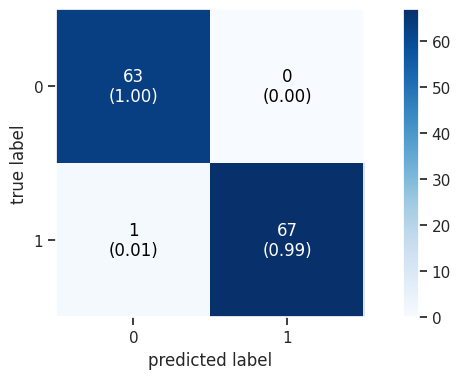

In [241]:
accuracy1, confusion_mat=LRclassifier(k)
print("Average Accuracy:",sum(accuracy1)/len(accuracy1))
print(confusion_mat)
conf_mat = confusion_mat.astype(int)
plt.figure(figsize=(4,4))
plot_confusion_matrix(conf_mat,show_normed=True,colorbar=True,show_absolute=True)
plt.show() 

# 2. Decision Tree Classification Model

---

Average Accuracy: 1.0
[[63.  0.]
 [ 0. 68.]]


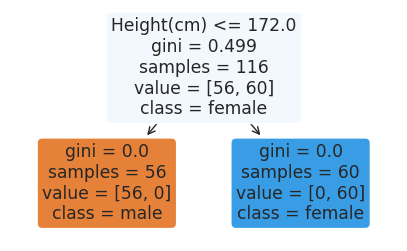

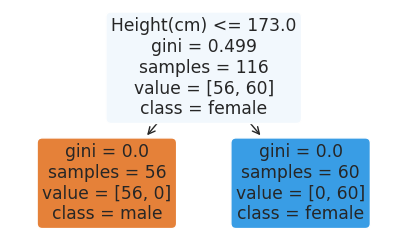

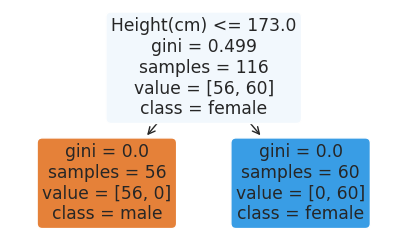

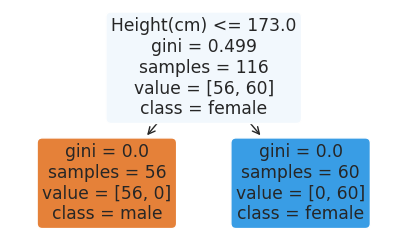

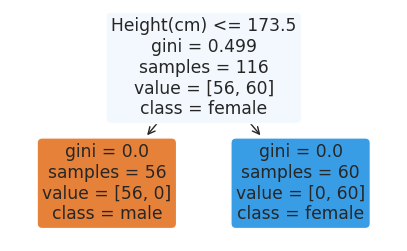

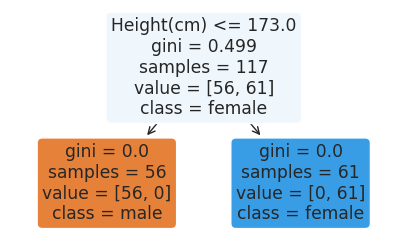

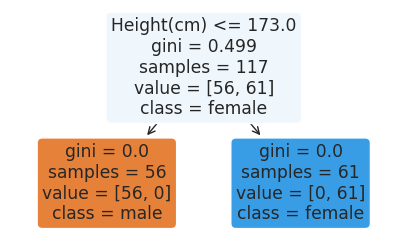

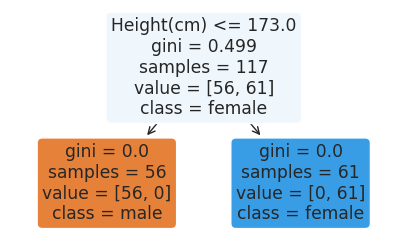

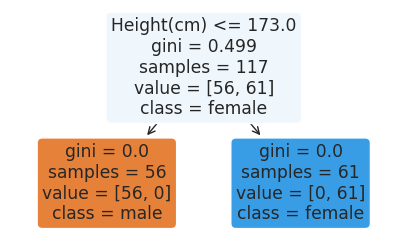

<Figure size 400x400 with 0 Axes>

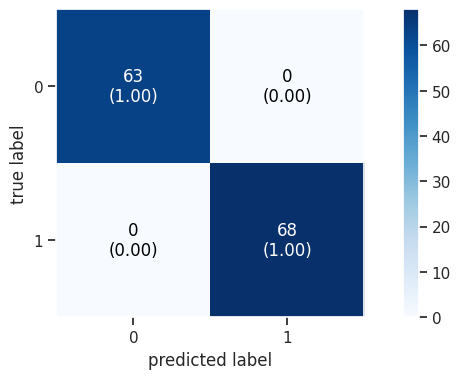

In [248]:
accuracy2, confusion_mat=DTclassifier(k)
print("Average Accuracy:",sum(accuracy2)/len(accuracy2))
print(confusion_mat)
conf_mat = confusion_mat.astype(int)
plt.figure(figsize=(4,4))
plot_confusion_matrix(conf_mat,show_normed=True,colorbar=True,show_absolute=True)
plt.show() 

# 3. Gaussian Naive Bayes Classification Model


---


Average Accuracy: 0.9920634920634921
[[63.  0.]
 [ 1. 67.]]


<Figure size 400x400 with 0 Axes>

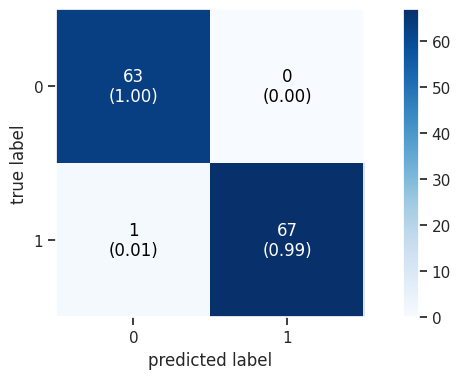

In [250]:
plt.figure(figsize=(4,4))
accuracy3, confusion_mat=NBclassifier(k)
print("Average Accuracy:",sum(accuracy3)/len(accuracy3))
print(confusion_mat)
conf_mat = confusion_mat.astype(int)
plot_confusion_matrix(conf_mat,show_normed=True,colorbar=True,show_absolute=True)
plt.show() 

# 4. KNN Classification Model

---


Average Accuracy: 0.873015873015873
[[58.  5.]
 [12. 56.]]


<Figure size 400x400 with 0 Axes>

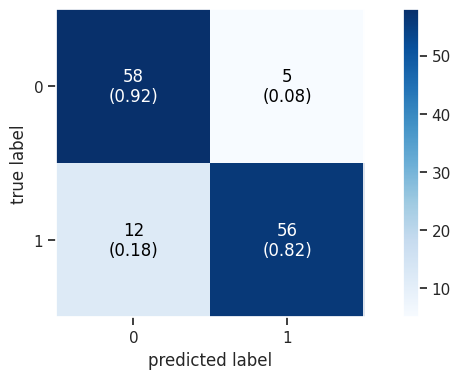

In [252]:
plt.figure(figsize=(4,4))
accuracy4, confusion_mat=KNNclassifier(k)
print("Average Accuracy:",sum(accuracy4)/len(accuracy4))
print(confusion_mat)
conf_mat = confusion_mat.astype(int)
plot_confusion_matrix(conf_mat,show_normed=True,colorbar=True,show_absolute=True)
plt.show() 

In [183]:
# Define the accuracy values for each classifier
accuracy = {
    'Logistic Regression': accuracy1,
    'Decision Tree': accuracy2,
    'Naive Bayes': accuracy3,
    'KNN': accuracy4
}

# Define the x-axis labels
labels=list()
for i in range(1,k+1):
  labels.append(f"Fold{i}")

# Define the color scale for each classifier
colors = ['lightgreen', 'yellowgreen', 'greenyellow', 'darkolivegreen']

# Create the bar traces for each classifier
data = []
for i, classifier in enumerate(accuracy.keys()):
    trace = go.Bar(x=labels, y=accuracy[classifier], name=classifier, marker=dict(color=colors[i]))
    data.append(trace)

# Define the layout of the plot
layout = go.Layout(
    title='Classifier Performance',
    xaxis=dict(title='Folds'),
    yaxis=dict(title='Accuracy')
)

# Create the figure object and plot the bar chart
fig = go.Figure(data=data, layout=layout)
fig.show()


# Thank You
